In [38]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import TensorDataset, Dataset, DataLoader
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split

In [39]:
df =pd.read_csv('/Users/abhishekwaghchaure/Desktop/Datasets/fashion MNIST/fashion-mnist_train.csv')

In [40]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


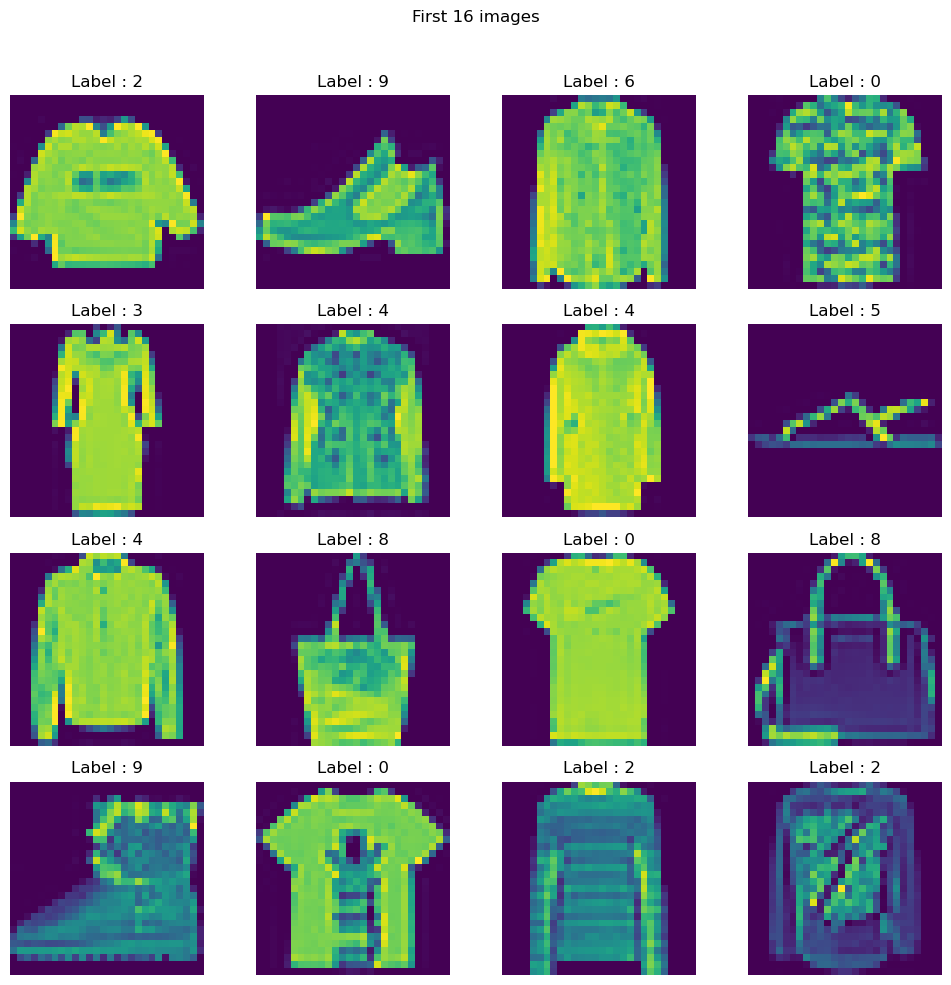

In [41]:

fig, axes = plt.subplots(4,4, figsize = (10,10))
fig.suptitle("First 16 images")

for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label : {df.iloc[i, 0]}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [42]:
X = df.iloc[: , 1:].values
y = df.iloc[: , 0].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=32)

In [44]:
print(X_train.shape)
print(X_test.shape)

(48000, 784)
(12000, 784)


In [45]:
X_train[0:5]

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 32, 29,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], shape=(5, 784))

In [46]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [47]:
X_train[0:5]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.1254902 , 0.11372549,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(5, 784))

In [48]:
## Custom Dataset
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
         return len(self.features)

    def __getitem__(self, index):
         return self.features[index], self.labels[index]



In [49]:
train_dataset = CustomDataset(X_train,y_train)

In [50]:
print(len(train_dataset))
print(type(train_dataset))

48000
<class '__main__.CustomDataset'>


In [51]:
X_test =torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)
test_dataset = TensorDataset(X_test,y_test)

In [52]:
print(len(test_dataset))
print(type(test_dataset))

12000
<class 'torch.utils.data.dataset.TensorDataset'>


In [53]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32)

## ANN

In [54]:
class MyNeuralNet(nn.Module):
    def __init__(self,num_features):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)   ### No need to add softmax as it is implemented in cross entropy loss by default in torch
        )
    def forward(self,x):
        return self.model(x)

In [55]:
## Set Learning Rate  and epoch
## Model Parameters
epochs = 100
learning_rate = 0.1

In [56]:
X_train.shape

(48000, 784)

In [57]:
## Instatiate Model
model = MyNeuralNet(784)

## Loss Function
criterion = nn.CrossEntropyLoss()

##Optimizer
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [58]:
print(len(train_loader))
print(len(train_dataset))


1500
48000


In [59]:
## Training Loop
for epoch in range(epochs):
    total_epoch_loss = 0.0
    for features, labels in train_loader:
        # Forward Pass
        out_puts = model(features)
        # Calculate Loss
        loss = criterion(out_puts, labels)
        # Back Propogation
        optimizer.zero_grad()
        loss.backward()
        # Update Gradients
        optimizer.step()

        total_epoch_loss = total_epoch_loss + loss.item()
        correct = (out_puts.argmax(dim =1) == labels).sum().item()

    accuracy = correct/len(labels)
    avg_epoch_loss = total_epoch_loss/len(train_loader)
    print(f"Epoch : {epoch+1}, loss = {avg_epoch_loss}, accuracy = {accuracy}")

Epoch : 1, loss = 0.6347635343074799, accuracy = 0.90625
Epoch : 2, loss = 0.4292797362705072, accuracy = 0.84375
Epoch : 3, loss = 0.3826106055304408, accuracy = 0.875
Epoch : 4, loss = 0.3561042730435729, accuracy = 0.8125
Epoch : 5, loss = 0.33594999490181604, accuracy = 0.84375
Epoch : 6, loss = 0.3206876742442449, accuracy = 0.8125
Epoch : 7, loss = 0.30752886502693094, accuracy = 0.84375
Epoch : 8, loss = 0.29539464142670235, accuracy = 0.9375
Epoch : 9, loss = 0.283274377780656, accuracy = 0.90625
Epoch : 10, loss = 0.2738580392723282, accuracy = 0.875
Epoch : 11, loss = 0.26550277438014747, accuracy = 0.96875
Epoch : 12, loss = 0.25856441669662794, accuracy = 0.875
Epoch : 13, loss = 0.25186528929074603, accuracy = 0.875
Epoch : 14, loss = 0.24300710749377807, accuracy = 0.90625
Epoch : 15, loss = 0.23875873544439674, accuracy = 0.90625
Epoch : 16, loss = 0.23072969799861312, accuracy = 1.0
Epoch : 17, loss = 0.22501991177971165, accuracy = 0.9375
Epoch : 18, loss = 0.221549314

In [60]:
## Trainig Loop with TQDM
for epoch in range(epochs):
    model.train()
    total_epoch_loss = 0.0
    correct = 0
    total = 0

    with tqdm(train_loader, unit = 'batch') as tepoch:
        tepoch.set_description(f'Epoch : {epoch + 1}/ {epochs}')
        for features, labels in tepoch:
            out_puts = model(features)
            loss = criterion(out_puts, labels)

            optimizer.zero_grad()
            loss.backward()

            optimizer.step()

            ##Loss and Accuracy
            total_epoch_loss = total_epoch_loss + loss.item()
            correct = (out_puts.argmax(dim = 1) == labels).sum().item()
            total += labels.shape[0]
            tepoch.set_postfix(loss = loss.item(), accuracy = (correct / len(labels) * 100))

        print(f"Epoch = {epoch + 1} --- Epoch_Loss = {total_epoch_loss:.4f} --- Epoch Accuracy = {correct/len(labels)*100:.2f}%")

Epoch : 1/ 100: 100%|██████████| 1500/1500 [00:06<00:00, 231.76batch/s, accuracy=96.9, loss=0.233]  


Epoch = 1 --- Epoch_Loss = 84.1984 --- Epoch Accuracy = 96.88%


Epoch : 2/ 100: 100%|██████████| 1500/1500 [00:06<00:00, 231.64batch/s, accuracy=100, loss=0.0167]  


Epoch = 2 --- Epoch_Loss = 85.9913 --- Epoch Accuracy = 100.00%


Epoch : 3/ 100: 100%|██████████| 1500/1500 [00:06<00:00, 215.83batch/s, accuracy=96.9, loss=0.0421] 


Epoch = 3 --- Epoch_Loss = 80.3045 --- Epoch Accuracy = 96.88%


Epoch : 4/ 100: 100%|██████████| 1500/1500 [00:06<00:00, 219.89batch/s, accuracy=96.9, loss=0.101]  


Epoch = 4 --- Epoch_Loss = 105.6218 --- Epoch Accuracy = 96.88%


Epoch : 5/ 100: 100%|██████████| 1500/1500 [00:06<00:00, 221.87batch/s, accuracy=96.9, loss=0.0576] 


Epoch = 5 --- Epoch_Loss = 83.7775 --- Epoch Accuracy = 96.88%


Epoch : 6/ 100: 100%|██████████| 1500/1500 [00:06<00:00, 228.04batch/s, accuracy=100, loss=0.0332]  


Epoch = 6 --- Epoch_Loss = 73.8579 --- Epoch Accuracy = 100.00%


Epoch : 7/ 100: 100%|██████████| 1500/1500 [00:06<00:00, 221.22batch/s, accuracy=96.9, loss=0.0352] 


Epoch = 7 --- Epoch_Loss = 81.6213 --- Epoch Accuracy = 96.88%


Epoch : 8/ 100: 100%|██████████| 1500/1500 [00:06<00:00, 238.19batch/s, accuracy=100, loss=0.0213]  


Epoch = 8 --- Epoch_Loss = 92.5343 --- Epoch Accuracy = 100.00%


Epoch : 9/ 100: 100%|██████████| 1500/1500 [00:06<00:00, 245.00batch/s, accuracy=96.9, loss=0.0695] 


Epoch = 9 --- Epoch_Loss = 91.8086 --- Epoch Accuracy = 96.88%


Epoch : 10/ 100: 100%|██████████| 1500/1500 [00:06<00:00, 236.08batch/s, accuracy=93.8, loss=0.123]  


Epoch = 10 --- Epoch_Loss = 86.5625 --- Epoch Accuracy = 93.75%


Epoch : 11/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 213.68batch/s, accuracy=100, loss=0.00652] 


Epoch = 11 --- Epoch_Loss = 74.8789 --- Epoch Accuracy = 100.00%


Epoch : 12/ 100: 100%|██████████| 1500/1500 [00:06<00:00, 216.97batch/s, accuracy=100, loss=0.0284]  


Epoch = 12 --- Epoch_Loss = 71.9177 --- Epoch Accuracy = 100.00%


Epoch : 13/ 100: 100%|██████████| 1500/1500 [00:06<00:00, 236.49batch/s, accuracy=100, loss=0.00125] 


Epoch = 13 --- Epoch_Loss = 79.2066 --- Epoch Accuracy = 100.00%


Epoch : 14/ 100: 100%|██████████| 1500/1500 [00:06<00:00, 216.04batch/s, accuracy=96.9, loss=0.0757] 


Epoch = 14 --- Epoch_Loss = 81.3180 --- Epoch Accuracy = 96.88%


Epoch : 15/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 213.52batch/s, accuracy=100, loss=0.00779] 


Epoch = 15 --- Epoch_Loss = 71.9753 --- Epoch Accuracy = 100.00%


Epoch : 16/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 204.69batch/s, accuracy=96.9, loss=0.0498] 


Epoch = 16 --- Epoch_Loss = 74.3025 --- Epoch Accuracy = 96.88%


Epoch : 17/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 173.12batch/s, accuracy=93.8, loss=0.152]  


Epoch = 17 --- Epoch_Loss = 70.5383 --- Epoch Accuracy = 93.75%


Epoch : 18/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 166.97batch/s, accuracy=96.9, loss=0.0305] 


Epoch = 18 --- Epoch_Loss = 68.9031 --- Epoch Accuracy = 96.88%


Epoch : 19/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 200.65batch/s, accuracy=96.9, loss=0.0774] 


Epoch = 19 --- Epoch_Loss = 64.7735 --- Epoch Accuracy = 96.88%


Epoch : 20/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 196.83batch/s, accuracy=96.9, loss=0.128]  


Epoch = 20 --- Epoch_Loss = 77.6841 --- Epoch Accuracy = 96.88%


Epoch : 21/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 200.82batch/s, accuracy=90.6, loss=0.218]  


Epoch = 21 --- Epoch_Loss = 71.5916 --- Epoch Accuracy = 90.62%


Epoch : 22/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 198.07batch/s, accuracy=100, loss=0.0134]  


Epoch = 22 --- Epoch_Loss = 66.3447 --- Epoch Accuracy = 100.00%


Epoch : 23/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 202.26batch/s, accuracy=96.9, loss=0.0327] 


Epoch = 23 --- Epoch_Loss = 71.8337 --- Epoch Accuracy = 96.88%


Epoch : 24/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 200.79batch/s, accuracy=100, loss=0.0124]  


Epoch = 24 --- Epoch_Loss = 71.8932 --- Epoch Accuracy = 100.00%


Epoch : 25/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 203.13batch/s, accuracy=96.9, loss=0.0402] 


Epoch = 25 --- Epoch_Loss = 66.2579 --- Epoch Accuracy = 96.88%


Epoch : 26/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 199.53batch/s, accuracy=100, loss=0.0378]  


Epoch = 26 --- Epoch_Loss = 63.4295 --- Epoch Accuracy = 100.00%


Epoch : 27/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 184.29batch/s, accuracy=100, loss=0.0431]  


Epoch = 27 --- Epoch_Loss = 65.9075 --- Epoch Accuracy = 100.00%


Epoch : 28/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 192.07batch/s, accuracy=93.8, loss=0.0716] 


Epoch = 28 --- Epoch_Loss = 63.0979 --- Epoch Accuracy = 93.75%


Epoch : 29/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 195.48batch/s, accuracy=100, loss=0.0233]  


Epoch = 29 --- Epoch_Loss = 63.9898 --- Epoch Accuracy = 100.00%


Epoch : 30/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 188.12batch/s, accuracy=100, loss=0.00091] 


Epoch = 30 --- Epoch_Loss = 56.0369 --- Epoch Accuracy = 100.00%


Epoch : 31/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 186.20batch/s, accuracy=100, loss=0.0302]  


Epoch = 31 --- Epoch_Loss = 52.3867 --- Epoch Accuracy = 100.00%


Epoch : 32/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 189.48batch/s, accuracy=93.8, loss=0.162]  


Epoch = 32 --- Epoch_Loss = 62.9011 --- Epoch Accuracy = 93.75%


Epoch : 33/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 187.85batch/s, accuracy=100, loss=0.00157] 


Epoch = 33 --- Epoch_Loss = 55.3983 --- Epoch Accuracy = 100.00%


Epoch : 34/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 189.24batch/s, accuracy=100, loss=0.0243]  


Epoch = 34 --- Epoch_Loss = 61.2125 --- Epoch Accuracy = 100.00%


Epoch : 35/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 187.25batch/s, accuracy=96.9, loss=0.0885] 


Epoch = 35 --- Epoch_Loss = 71.1432 --- Epoch Accuracy = 96.88%


Epoch : 36/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 193.13batch/s, accuracy=96.9, loss=0.0506] 


Epoch = 36 --- Epoch_Loss = 60.0443 --- Epoch Accuracy = 96.88%


Epoch : 37/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 196.31batch/s, accuracy=90.6, loss=0.245]  


Epoch = 37 --- Epoch_Loss = 50.4831 --- Epoch Accuracy = 90.62%


Epoch : 38/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 189.46batch/s, accuracy=100, loss=0.0075]  


Epoch = 38 --- Epoch_Loss = 58.5640 --- Epoch Accuracy = 100.00%


Epoch : 39/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 190.26batch/s, accuracy=100, loss=0.00363] 


Epoch = 39 --- Epoch_Loss = 54.3962 --- Epoch Accuracy = 100.00%


Epoch : 40/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 190.04batch/s, accuracy=100, loss=0.00549] 


Epoch = 40 --- Epoch_Loss = 45.0503 --- Epoch Accuracy = 100.00%


Epoch : 41/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 190.49batch/s, accuracy=100, loss=0.0326]  


Epoch = 41 --- Epoch_Loss = 48.6518 --- Epoch Accuracy = 100.00%


Epoch : 42/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 195.49batch/s, accuracy=93.8, loss=0.445]  


Epoch = 42 --- Epoch_Loss = 64.2538 --- Epoch Accuracy = 93.75%


Epoch : 43/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 194.31batch/s, accuracy=100, loss=0.00102] 


Epoch = 43 --- Epoch_Loss = 56.7067 --- Epoch Accuracy = 100.00%


Epoch : 44/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 181.86batch/s, accuracy=100, loss=0.00721] 


Epoch = 44 --- Epoch_Loss = 62.2036 --- Epoch Accuracy = 100.00%


Epoch : 45/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 198.87batch/s, accuracy=100, loss=0.00152] 


Epoch = 45 --- Epoch_Loss = 66.3828 --- Epoch Accuracy = 100.00%


Epoch : 46/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 194.54batch/s, accuracy=100, loss=0.0139]  


Epoch = 46 --- Epoch_Loss = 70.0246 --- Epoch Accuracy = 100.00%


Epoch : 47/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 196.79batch/s, accuracy=100, loss=0.0257]  


Epoch = 47 --- Epoch_Loss = 70.2987 --- Epoch Accuracy = 100.00%


Epoch : 48/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 195.83batch/s, accuracy=93.8, loss=0.0712] 


Epoch = 48 --- Epoch_Loss = 54.1387 --- Epoch Accuracy = 93.75%


Epoch : 49/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 197.56batch/s, accuracy=100, loss=0.0121]  


Epoch = 49 --- Epoch_Loss = 42.1144 --- Epoch Accuracy = 100.00%


Epoch : 50/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 196.61batch/s, accuracy=96.9, loss=0.0864] 


Epoch = 50 --- Epoch_Loss = 57.8330 --- Epoch Accuracy = 96.88%


Epoch : 51/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 202.56batch/s, accuracy=100, loss=0.012]   


Epoch = 51 --- Epoch_Loss = 55.4536 --- Epoch Accuracy = 100.00%


Epoch : 52/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 205.49batch/s, accuracy=100, loss=0.00864] 


Epoch = 52 --- Epoch_Loss = 36.3090 --- Epoch Accuracy = 100.00%


Epoch : 53/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 204.53batch/s, accuracy=100, loss=0.00247] 


Epoch = 53 --- Epoch_Loss = 38.2583 --- Epoch Accuracy = 100.00%


Epoch : 54/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 173.82batch/s, accuracy=96.9, loss=0.026]  


Epoch = 54 --- Epoch_Loss = 29.4557 --- Epoch Accuracy = 96.88%


Epoch : 55/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 168.20batch/s, accuracy=96.9, loss=0.0608] 


Epoch = 55 --- Epoch_Loss = 76.4598 --- Epoch Accuracy = 96.88%


Epoch : 56/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 182.68batch/s, accuracy=93.8, loss=0.135]  


Epoch = 56 --- Epoch_Loss = 71.2727 --- Epoch Accuracy = 93.75%


Epoch : 57/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 201.11batch/s, accuracy=96.9, loss=0.102]  


Epoch = 57 --- Epoch_Loss = 55.1456 --- Epoch Accuracy = 96.88%


Epoch : 58/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 200.69batch/s, accuracy=96.9, loss=0.0704] 


Epoch = 58 --- Epoch_Loss = 46.4429 --- Epoch Accuracy = 96.88%


Epoch : 59/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 180.38batch/s, accuracy=96.9, loss=0.0863] 


Epoch = 59 --- Epoch_Loss = 42.9469 --- Epoch Accuracy = 96.88%


Epoch : 60/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 172.53batch/s, accuracy=100, loss=0.00518] 


Epoch = 60 --- Epoch_Loss = 48.4128 --- Epoch Accuracy = 100.00%


Epoch : 61/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 170.43batch/s, accuracy=93.8, loss=0.244]  


Epoch = 61 --- Epoch_Loss = 69.1263 --- Epoch Accuracy = 93.75%


Epoch : 62/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 192.11batch/s, accuracy=100, loss=0.0304]  


Epoch = 62 --- Epoch_Loss = 56.0164 --- Epoch Accuracy = 100.00%


Epoch : 63/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 213.17batch/s, accuracy=100, loss=0.00505] 


Epoch = 63 --- Epoch_Loss = 33.1642 --- Epoch Accuracy = 100.00%


Epoch : 64/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 201.95batch/s, accuracy=96.9, loss=0.0582] 


Epoch = 64 --- Epoch_Loss = 27.2620 --- Epoch Accuracy = 96.88%


Epoch : 65/ 100: 100%|██████████| 1500/1500 [00:06<00:00, 222.11batch/s, accuracy=96.9, loss=0.0564] 


Epoch = 65 --- Epoch_Loss = 48.8117 --- Epoch Accuracy = 96.88%


Epoch : 66/ 100: 100%|██████████| 1500/1500 [00:06<00:00, 240.37batch/s, accuracy=100, loss=0.0024]  


Epoch = 66 --- Epoch_Loss = 47.6792 --- Epoch Accuracy = 100.00%


Epoch : 67/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 203.55batch/s, accuracy=93.8, loss=0.139]  


Epoch = 67 --- Epoch_Loss = 39.0213 --- Epoch Accuracy = 93.75%


Epoch : 68/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 198.96batch/s, accuracy=100, loss=3.25e-5] 


Epoch = 68 --- Epoch_Loss = 51.6691 --- Epoch Accuracy = 100.00%


Epoch : 69/ 100: 100%|██████████| 1500/1500 [00:10<00:00, 139.68batch/s, accuracy=100, loss=0.0101]  


Epoch = 69 --- Epoch_Loss = 30.9878 --- Epoch Accuracy = 100.00%


Epoch : 70/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 194.85batch/s, accuracy=100, loss=0.0392]  


Epoch = 70 --- Epoch_Loss = 46.1949 --- Epoch Accuracy = 100.00%


Epoch : 71/ 100: 100%|██████████| 1500/1500 [00:07<00:00, 210.38batch/s, accuracy=96.9, loss=0.0245] 


Epoch = 71 --- Epoch_Loss = 44.5908 --- Epoch Accuracy = 96.88%


Epoch : 72/ 100: 100%|██████████| 1500/1500 [00:10<00:00, 148.49batch/s, accuracy=96.9, loss=0.0833] 


Epoch = 72 --- Epoch_Loss = 34.7738 --- Epoch Accuracy = 96.88%


Epoch : 73/ 100: 100%|██████████| 1500/1500 [00:09<00:00, 165.56batch/s, accuracy=100, loss=0.00085] 


Epoch = 73 --- Epoch_Loss = 34.0353 --- Epoch Accuracy = 100.00%


Epoch : 74/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 166.82batch/s, accuracy=100, loss=0.000489]


Epoch = 74 --- Epoch_Loss = 60.9261 --- Epoch Accuracy = 100.00%


Epoch : 75/ 100: 100%|██████████| 1500/1500 [00:09<00:00, 157.24batch/s, accuracy=96.9, loss=0.0293] 


Epoch = 75 --- Epoch_Loss = 50.1787 --- Epoch Accuracy = 96.88%


Epoch : 76/ 100: 100%|██████████| 1500/1500 [00:09<00:00, 163.14batch/s, accuracy=100, loss=0.0055]  


Epoch = 76 --- Epoch_Loss = 32.8008 --- Epoch Accuracy = 100.00%


Epoch : 77/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 179.74batch/s, accuracy=100, loss=0.0168]  


Epoch = 77 --- Epoch_Loss = 32.9104 --- Epoch Accuracy = 100.00%


Epoch : 78/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 175.17batch/s, accuracy=100, loss=0.00949] 


Epoch = 78 --- Epoch_Loss = 30.8509 --- Epoch Accuracy = 100.00%


Epoch : 79/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 173.26batch/s, accuracy=100, loss=0.0197]  


Epoch = 79 --- Epoch_Loss = 59.3417 --- Epoch Accuracy = 100.00%


Epoch : 80/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 169.03batch/s, accuracy=100, loss=0.0356]  


Epoch = 80 --- Epoch_Loss = 38.0806 --- Epoch Accuracy = 100.00%


Epoch : 81/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 179.33batch/s, accuracy=100, loss=0.00163] 


Epoch = 81 --- Epoch_Loss = 36.4594 --- Epoch Accuracy = 100.00%


Epoch : 82/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 176.83batch/s, accuracy=96.9, loss=0.0722] 


Epoch = 82 --- Epoch_Loss = 44.3962 --- Epoch Accuracy = 96.88%


Epoch : 83/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 173.43batch/s, accuracy=100, loss=0.000956]


Epoch = 83 --- Epoch_Loss = 45.3368 --- Epoch Accuracy = 100.00%


Epoch : 84/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 179.60batch/s, accuracy=96.9, loss=0.166]  


Epoch = 84 --- Epoch_Loss = 40.3522 --- Epoch Accuracy = 96.88%


Epoch : 85/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 177.27batch/s, accuracy=100, loss=0.0272]  


Epoch = 85 --- Epoch_Loss = 29.4261 --- Epoch Accuracy = 100.00%


Epoch : 86/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 177.93batch/s, accuracy=100, loss=0.00517] 


Epoch = 86 --- Epoch_Loss = 45.2403 --- Epoch Accuracy = 100.00%


Epoch : 87/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 181.75batch/s, accuracy=100, loss=0.0164]  


Epoch = 87 --- Epoch_Loss = 34.5013 --- Epoch Accuracy = 100.00%


Epoch : 88/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 177.51batch/s, accuracy=96.9, loss=0.09]   


Epoch = 88 --- Epoch_Loss = 44.1651 --- Epoch Accuracy = 96.88%


Epoch : 89/ 100: 100%|██████████| 1500/1500 [00:09<00:00, 162.86batch/s, accuracy=100, loss=0.025]   


Epoch = 89 --- Epoch_Loss = 59.3547 --- Epoch Accuracy = 100.00%


Epoch : 90/ 100: 100%|██████████| 1500/1500 [00:09<00:00, 152.25batch/s, accuracy=100, loss=0.0108]  


Epoch = 90 --- Epoch_Loss = 44.3819 --- Epoch Accuracy = 100.00%


Epoch : 91/ 100: 100%|██████████| 1500/1500 [00:09<00:00, 163.34batch/s, accuracy=100, loss=0.00142] 


Epoch = 91 --- Epoch_Loss = 39.9002 --- Epoch Accuracy = 100.00%


Epoch : 92/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 178.12batch/s, accuracy=100, loss=0.0122]  


Epoch = 92 --- Epoch_Loss = 21.2576 --- Epoch Accuracy = 100.00%


Epoch : 93/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 173.23batch/s, accuracy=100, loss=0.000221]


Epoch = 93 --- Epoch_Loss = 37.1226 --- Epoch Accuracy = 100.00%


Epoch : 94/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 167.55batch/s, accuracy=100, loss=0.00392] 


Epoch = 94 --- Epoch_Loss = 46.8648 --- Epoch Accuracy = 100.00%


Epoch : 95/ 100: 100%|██████████| 1500/1500 [00:09<00:00, 165.85batch/s, accuracy=96.9, loss=0.0453] 


Epoch = 95 --- Epoch_Loss = 17.9431 --- Epoch Accuracy = 96.88%


Epoch : 96/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 170.20batch/s, accuracy=96.9, loss=0.173]  


Epoch = 96 --- Epoch_Loss = 20.8444 --- Epoch Accuracy = 96.88%


Epoch : 97/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 177.00batch/s, accuracy=96.9, loss=0.065]  


Epoch = 97 --- Epoch_Loss = 22.4872 --- Epoch Accuracy = 96.88%


Epoch : 98/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 178.66batch/s, accuracy=100, loss=0.0118]  


Epoch = 98 --- Epoch_Loss = 59.3782 --- Epoch Accuracy = 100.00%


Epoch : 99/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 177.05batch/s, accuracy=100, loss=0.00682] 


Epoch = 99 --- Epoch_Loss = 37.3367 --- Epoch Accuracy = 100.00%


Epoch : 100/ 100: 100%|██████████| 1500/1500 [00:08<00:00, 179.07batch/s, accuracy=100, loss=0.0171]  


Epoch = 100 --- Epoch_Loss = 35.4556 --- Epoch Accuracy = 100.00%


In [61]:
model.eval()
total = 0
correct =0
with torch.no_grad():
    for features, labels in test_loader:
        out_puts = model(features)

        total = total + labels.shape[0]
        correct = correct + (out_puts.argmax(dim = 1) == labels).sum().item()
print(correct/total)

0.88725
